In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from lifelines import*

In [25]:
df = pd.read_excel('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/supervivencia_examenes.xlsx')

In [26]:
df

,id,tiempo,examen,calificación,género
0,1,85,1,100.0,m
1,2,109,1,100.0,m
2,3,118,1,100.0,m
3,4,120,1,100.0,f
4,5,106,1,98.0,f
5,6,103,1,98.0,m
6,7,108,1,96.0,f
7,8,119,1,96.0,f
8,9,115,1,96.0,f
9,10,108,1,94.0,f


a)

In [27]:
#tiempo y calificacion promedio
df.groupby('tiempo').mean()

,id,examen,calificación
tiempo,,,
85,1.0,1.0,100.0
87,11.0,1.0,88.0
90,15.0,1.0,78.0
99,12.0,1.0,86.0
103,6.0,1.0,98.0
106,5.0,1.0,98.0
108,8.5,1.0,95.0
109,2.0,1.0,100.0
111,14.0,1.0,82.0


In [28]:
#tiempo y calificacion promedio por género
df.groupby('género').mean()

,id,tiempo,examen,calificación
género,,,,
f,8.750000,108.125000,1.0,93.000000
m,9.222222,106.666667,1.0,88.666667


In [29]:
pd.crosstab(df['género'], df['calificación'])

calificación,72.0,74.0,78.0,82.0,84.0,86.0,88.0,94.0,96.0,98.0,100.0
género,,,,,,,,,,,
f,0,0,1,0,0,1,0,1,3,1,1
m,1,1,0,1,1,0,1,0,0,1,3


In [30]:
from lifelines import KaplanMeierFitter

In [31]:
kmf = KaplanMeierFitter()

In [35]:
mujer = df[df['género']=='f']
hombre = df[df['género']=='m']
TM = mujer['tiempo']
CM = mujer['calificación']

TH = hombre['tiempo']
CH = hombre['calificación']

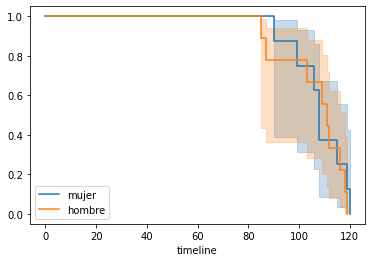

In [45]:
#funcion de supervivencia mujeres y hombres

ax = plt.subplot(111)
ax = kmf.fit(TM, CM, label="mujer").plot(ax=ax)
ax = kmf.fit(TH, CH, label="hombre").plot(ax=ax)

In [52]:
#funcion de supervivencia mujeres
kmf.fit(TM, CM, label="mujer")
kmf.survival_function_

,mujer
timeline,
0.0,1.000
90.0,0.875
99.0,0.750
106.0,0.625
108.0,0.375
115.0,0.250
119.0,0.125
120.0,0.000


In [57]:
#intervalos de confianza mujeres
kmf.fit(TM, CM, label="mujer")
kmf.confidence_interval_

,mujer_lower_0.95,mujer_upper_0.95
0.0,1.000000,1.000000
90.0,0.387000,0.981393
99.0,0.314807,0.930898
106.0,0.229333,0.860698
108.0,0.087006,0.674363
115.0,0.037067,0.558084
119.0,0.006593,0.422706
120.0,0.000000,0.000000


In [51]:
#funcion de supervivencia hombres
kmf.fit(TH, CH, label="hombre")
kmf.survival_function_

,hombre
timeline,
0.0,1.000000
85.0,0.888889
87.0,0.777778
103.0,0.666667
109.0,0.555556
111.0,0.444444
112.0,0.333333
116.0,0.222222
118.0,0.111111


In [59]:
#intervalos de confianza hombres
kmf.fit(TH, CH, label="hombre")
kmf.confidence_interval_

,hombre_lower_0.95,hombre_upper_0.95
0.0,1.000000,1.000000
85.0,0.432965,0.983564
87.0,0.364751,0.939296
103.0,0.281682,0.878307
109.0,0.204242,0.804525
111.0,0.135872,0.719315
112.0,0.078289,0.622627
116.0,0.033711,0.513068
118.0,0.006129,0.387665
119.0,0.000000,0.000000


In [64]:
#LONG RANK TEST
from lifelines.statistics import logrank_test

results = logrank_test(TM, TH, event_observed_A = CM, event_observed_B = CH)
results.print_summary

<bound method StatisticalResult.print_summary of <lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.15 0.69      0.53>

H0: Las funciones de supervivencia de hombres y mujeres son iguales 

H1: Las funciones de supervivencia de hombres y mujeres son distintas

Como tenemos un P-Valor mayor a .05, rechazamos H0, por tanto Las funciones de supervivencia de hombres y mujeres son distintas

e) Modelo de Cox de riesgos proporcionales

In [65]:
from lifelines import CoxPHFitter

In [72]:
cph = CoxPHFitter()
cph.fit(df, duration_col='tiempo', event_col='calificación')
print.summary

ValueError: could not convert string to float: 'f'